## Logistic Regression
It’s a classification algorithm, that is used where the response variable is categorical. The idea of Logistic Regression is to find a relationship between features and probability of particular outcome.

Logistic regression can be expressed as:

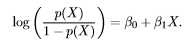

where, the left hand side is called the logit or log-odds function, and p(x)/(1-p(x)) is called odds.

If we take an inverse of the above function, we get:

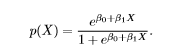

This is known as the Sigmoid function and it gives an S-shaped curve. It always gives a value of probability ranging from 0<p<1.

#### Sigmoid function



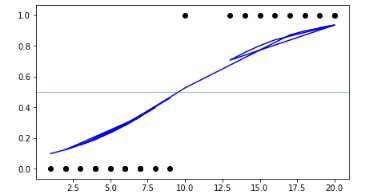

## Model accuracy and confusion matrix

The accuracy of the model is given by:

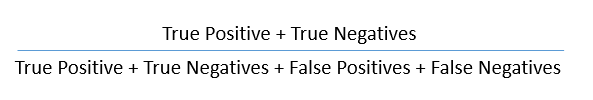

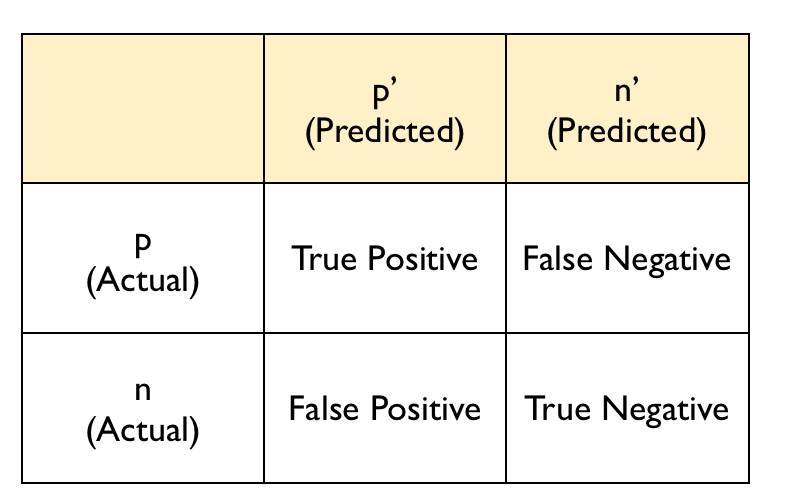

In [17]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [5]:
## Set working directory
os.chdir(r'C:\Business Health Index\LogisticRegression')

In [25]:
## Load the data

dataset = pd.read_csv('Iris.csv')

In [13]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

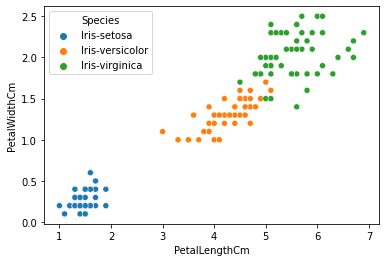

In [20]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue="Species", data=dataset)

In [26]:
dataset['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [27]:
## Convert Y column to numbers

dataset=dataset.replace('Iris-versicolor',0)
dataset=dataset.replace('Iris-setosa',1)
dataset=dataset.replace('Iris-virginica',2)

In [28]:
dataset['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [30]:
## Create X and Y data sets

X = dataset[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y = dataset['Species']

In [32]:
## Split the datset into Train and Test

X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2)

In [33]:
X_train.shape

(120, 4)

In [34]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

C:\Users\rahul.padinjarayil\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [35]:
y_pred=clf.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test, y_pred, labels=[0,1,2])
cnf_matrix

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]], dtype=int64)

In [37]:
### accuracy calculation
from sklearn import metrics
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  1.0
